In [1]:
import ebisim as eb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = eb.Target.get_ions("K", 1.2e5, kT=13)

# k = eb.Target.get_ions("K", 1.2e5, kT=27)

In [3]:
k.kT

array([1.0e-03, 1.3e+01, 1.0e-03, 1.0e-03, 1.0e-03, 1.0e-03, 1.0e-03,
       1.0e-03, 1.0e-03, 1.0e-03, 1.0e-03, 1.0e-03, 1.0e-03, 1.0e-03,
       1.0e-03, 1.0e-03, 1.0e-03, 1.0e-03, 1.0e-03, 1.0e-03])

In [4]:
dev = eb.Device.get(.170, 3800, 250e-6*1.2, 0.8, 1200, 2, 0.005, n_grid=500,)

# dev = eb.Device.get(.170, 3800, 250e-6*1., 0.8, 1200, 2, 0.005, n_grid=500,)

In [5]:
res = eb.advanced_simulation(dev, k, 100e-3, options=eb.ModelOptions(RADIAL_DYNAMICS=True, SPITZER_HEATING=True), solver_kwargs={"dense_output":True, "max_step":1}, rates=True)


Integration finished: 5262 calls                    
The solver successfully reached the end of the integration interval.
Calls: 5262 of which ~1656 normal (31.47%) and ~3600 for jacobian approximation (68.42%)
Rates finished: 167 rates


/home/hpahl/Repos/EBISSimulation/ebisim/plotting.py:489: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


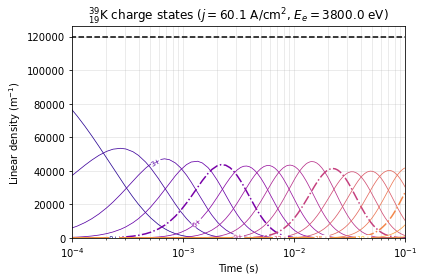

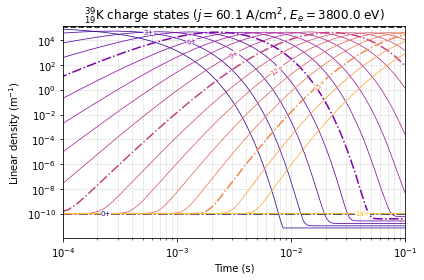

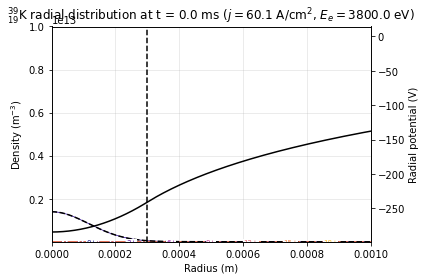

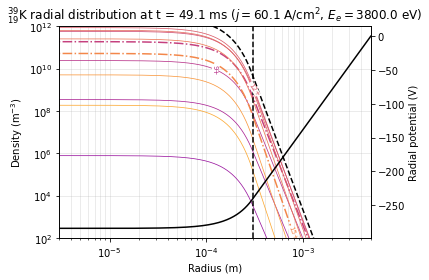

In [6]:
_ = res.plot()
_ = res.plot(yscale="log")
_ = res.plot_radial_distribution_at_time(0, xlim=(0,0.001),xscale="linear", yscale="linear")
_ = res.plot_radial_distribution_at_time(0.0491)

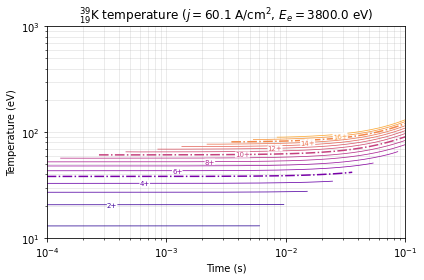

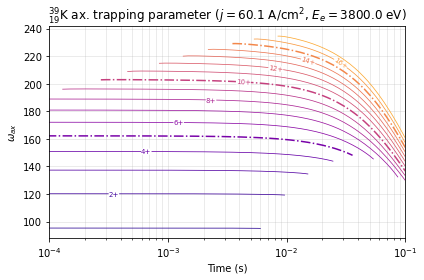

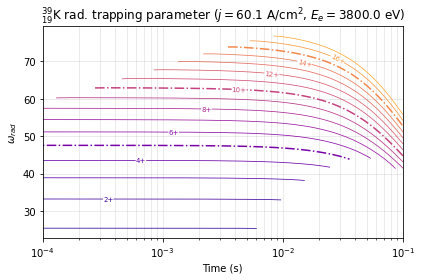

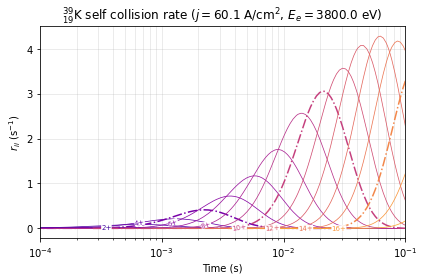

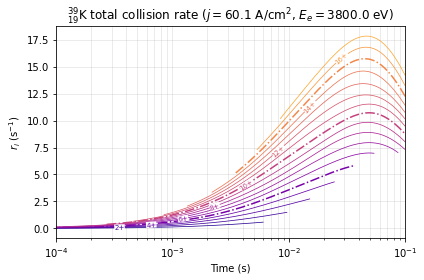

In [7]:
_ = res.plot_temperature()
_ = res.plot_rate(eb.Rate.W_AX)
_ = res.plot_rate(eb.Rate.W_RA)
_ = res.plot_rate(eb.Rate.COLLISION_RATE_SELF)
_ = res.plot_rate(eb.Rate.COLLISION_RATE_TOTAL)



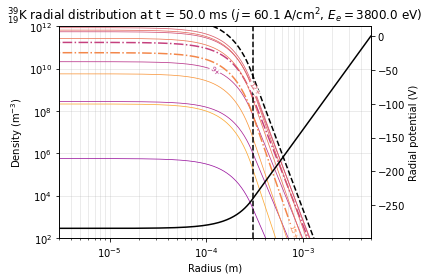

In [8]:
_ = res.plot_radial_distribution_at_time(50e-3)

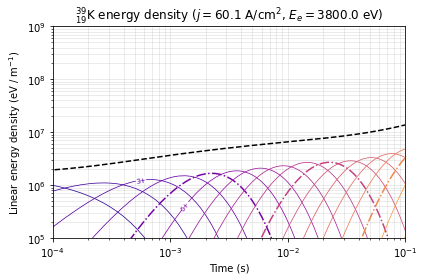

In [9]:
_ = res.plot_energy_density()

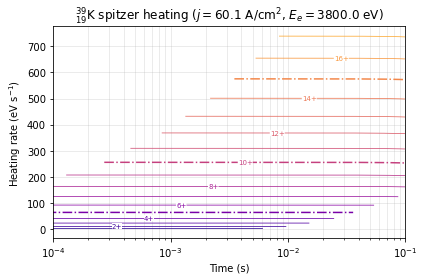

In [10]:
_ = res.plot_rate(eb.Rate.T_SPITZER_HEATING)

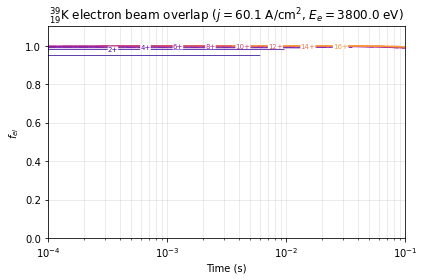

In [11]:
_ = res.plot_rate(eb.Rate.F_EI)

In [12]:
cs = 10
t = 0.1
U = 1e4
phi, n, shape = res.radial_distribution_at_time(t)

r = dev.rad_grid

In [13]:
r2m = np.trapz(r**3*shape[cs],r)/np.trapz(r*shape[cs],r)
kT = res.temperature_at_time(t)[cs]
em = np.sqrt(1/4 * kT*r2m/cs /U)
print(em)

2.0863270018794644e-06


In [14]:
r = dev.rad_grid
def em(res, t, cs=10, U=2.e4):
    phi, n, shape = res.radial_distribution_at_time(t)
    r2m = np.trapz(r**3*shape[cs],r)/np.trapz(r*shape[cs],r)
    kT = res.temperature_at_time(t)[cs]
#     print(kT)
    em = np.sqrt(1/4 * kT*r2m/cs /U)
    rc = k.a * eb.M_P*np.sqrt(k.a * kT * eb.Q_E/2/k.a/eb.M_P)/cs/eb.Q_E/20
    fact = 1+1/2*np.sqrt(r2m)/(rc)
#     print(rc, np.sqrt(r2m))
    mem = fact*em
    return em, mem, np.sqrt(r2m), kT

In [15]:
ts = np.linspace(25e-3, 90e-3, 100)
ems = []
mems = []
rs = []
kTs = []
for t in ts:
    _em, _mem, _r, _kT = em(res, t, 10, 20000)
    ems.append(_em)
    mems.append(_mem)
    rs.append(_r)
    kTs.append(_kT)
ems = np.array(ems)
mems = np.array(mems)
rs = np.array(rs)
ts = np.array(ts)
kTs = np.array(kTs)

    

1.328780400045635
1.3317294257462546


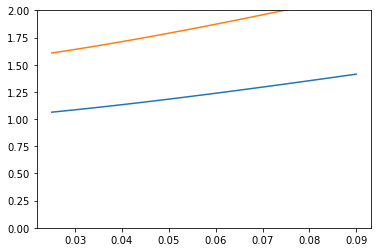

In [16]:
fig, ax = plt.subplots()
ax.plot(ts, 1e6*ems)
ax.plot(ts, 1e6*mems)

ax.set_ylim(0, 2)
print(ems[-1]/ems[0])
print(mems[-1]/mems[0])

(0.0, 200.0)

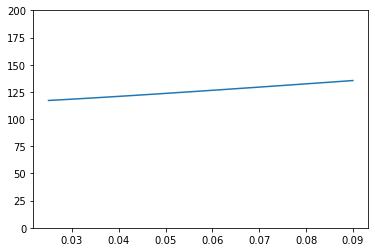

In [17]:
fig, ax = plt.subplots()
ax.plot(ts, 1e6*rs)
ax.set_ylim(0, 200)

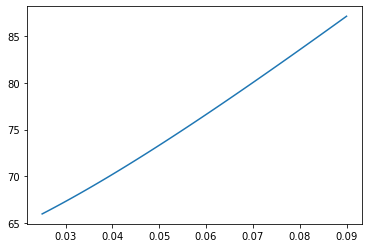

In [18]:
fig, ax = plt.subplots()
ax.plot(ts, kTs)

In [19]:
res.res.sol(t)[30]

87.10348273899363